In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "cosmetics_sales_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# Data types and summary
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

Shape: (374, 6)

Columns: ['Sales Person', 'Country', 'Product', 'Date', 'Amount ($)', 'Boxes Shipped']

Missing values:
 Sales Person     0
Country          0
Product          0
Date             0
Amount ($)       0
Boxes Shipped    0
dtype: int64

Data Types:
 Sales Person      object
Country           object
Product           object
Date              object
Amount ($)       float64
Boxes Shipped      int64
dtype: object

Summary Statistics:
          Amount ($)  Boxes Shipped
count    374.000000     374.000000
mean    7778.353262     249.072193
std     5655.378093     144.235296
min      119.820000      10.000000
25%     3325.250000     140.000000
50%     6513.655000     246.000000
75%    11331.897500     364.000000
max    23977.480000     499.000000


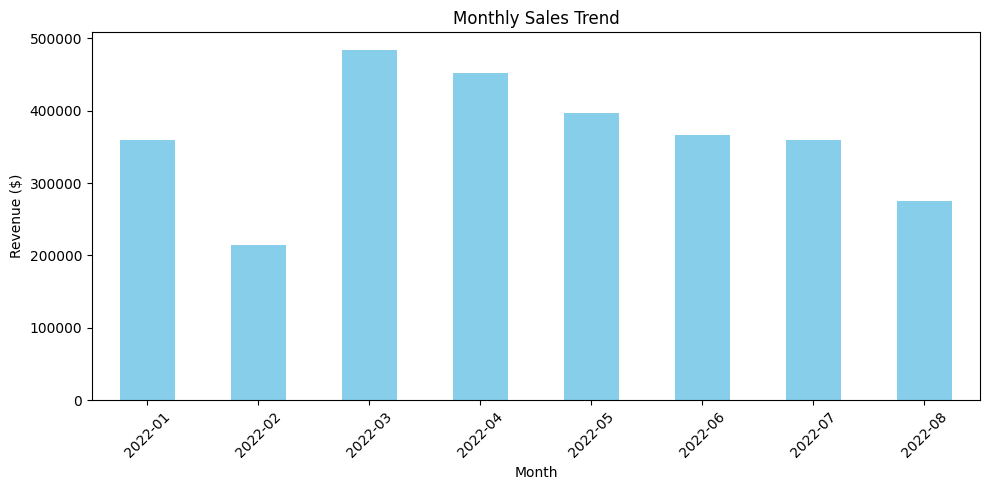

In [4]:
# Monthly sales trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount ($)'].sum()
monthly_sales.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

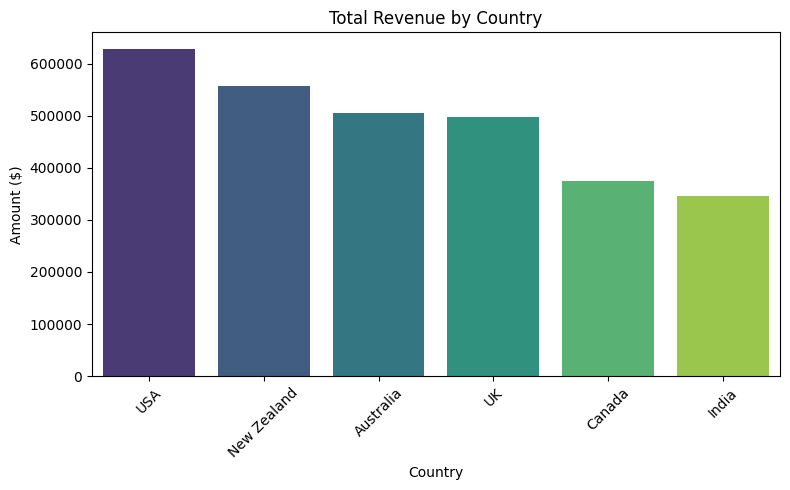

In [ ]:
# Top sales by country
plt.figure(figsize=(8,5))
sns.barplot(x=df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False).index,
            hue=df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False).index, # add karena error palet bisa di buang untuk line ini
            y=df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False).values,
            palette="viridis")
plt.title("Total Revenue by Country")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

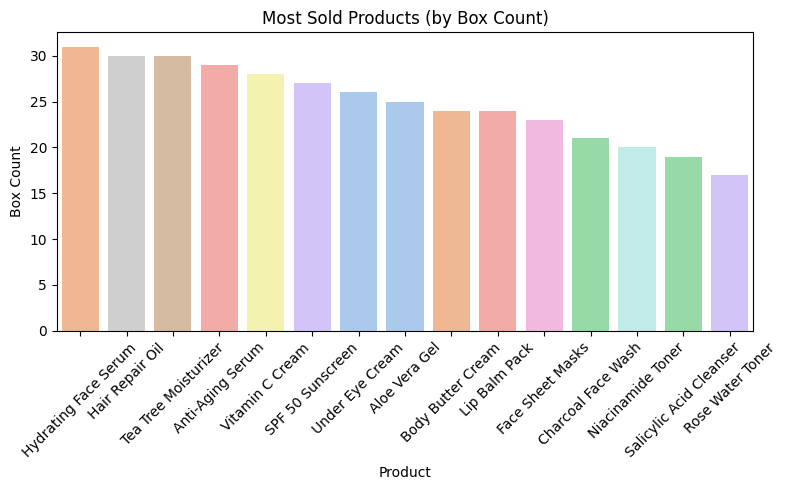

In [12]:
# Top selling products
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product',hue='Product', order=df['Product'].value_counts().index, palette="pastel")
plt.title("Most Sold Products (by Box Count)")
plt.ylabel("Box Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

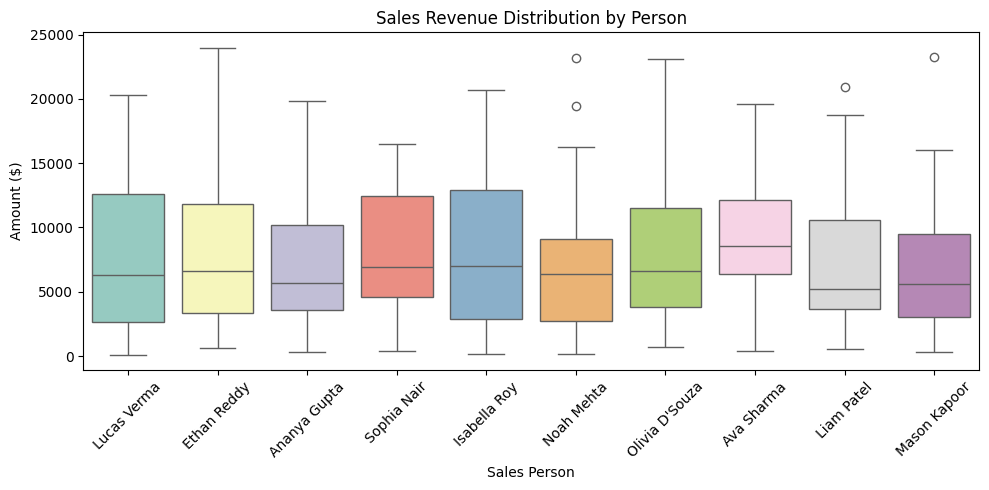

In [13]:
# Revenue by Sales Person
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Sales Person',hue='Sales Person', y='Amount ($)', palette="Set3")
plt.title("Sales Revenue Distribution by Person")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

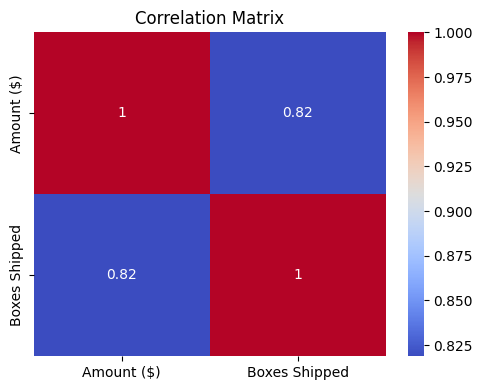

In [8]:
# Correlation Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df[['Amount ($)', 'Boxes Shipped']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()